# Face Detection with OpenCV - Haar Cascade Classifier

In this notebook, we'll demonstrate how to perform face detection using OpenCV's `CascadeClassifier`.  
We'll detect faces in images, draw bounding boxes, and save cropped face regions.

## What is Haar Cascade?
- Haar cascades are pre-trained classifiers based on Haar features.
- OpenCV provides XML files trained to detect faces, eyes, smiles, etc.
- These classifiers work by scanning images at multiple scales and locations.

We'll use:  
`haarcascade_frontalface_default.xml` – trained for detecting frontal human faces.

In simple language:

### Haar Cascades in OpenCV are a way to detect objects like faces, eyes, or cars in images or videos.

Think of it like this:

* A **Haar Cascade** is a trained detector.
* It has learned **patterns** from lots of images (e.g. what a face looks like).
* When you give it a new image, it **scans** the image in small parts and tries to find those patterns.
* If it finds a match, it says: “Hey, here’s a face (or a car, etc.)!”

### Key points:

* It works well for **simple, well-lit images**.
* It is **fast** but **not as accurate** as modern deep learning methods (like YOLO or SSD).
* The files like `haarcascade_frontalface_default.xml` are **pre-trained models**.

Would you like a quick demo example using Haar cascades in code?


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

def show_img(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 4))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

### Load Haar Cascade Classifier
`CascadeClassifier()` is a class in OpenCV used to load the cascade XML file.

**Syntax:**  
```python
cv2.CascadeClassifier(path_to_xml)
```

You must check if the classifier loaded correctly using `.empty()`.

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
if face_cascade.empty():
    print("Error: Haar cascade XML not loaded!")
else:
    print("Haar cascade loaded successfully.")

Haar cascade loaded successfully.


In [3]:
# image_path = "images/face_sample.jpg"
image_path = "images/multi.jpg"

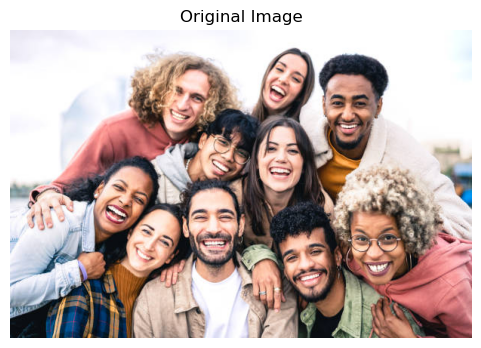

In [4]:
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found. Please ensure '{image_path}' exists in the current directory.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(img, "Original Image")

### Why convert to grayscale?
Haar cascades work on single-channel images (grayscale), not color images.

Detected 8 face(s).


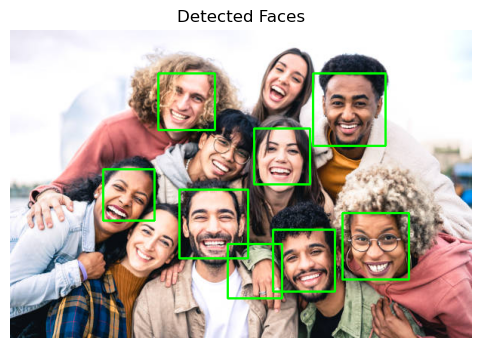

In [5]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)
print(f"Detected {len(faces)} face(s).")

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

show_img(img, "Detected Faces")

### detectMultiScale()
**Parameters:**
- `scaleFactor`: Image size reduction per scale
- `minNeighbors`: Number of rectangles that must be grouped
- `minSize`: Minimum face size to detect

**Returns:** List of bounding boxes.

In [6]:
if not os.path.exists("cropped_faces"):
    os.makedirs("cropped_faces")

img_original = cv2.imread(image_path)

for idx, (x, y, w, h) in enumerate(faces):
    face_crop = img_original[y:y+h, x:x+w]
    path = f"cropped_faces/face_{idx+1}.jpg"
    cv2.imwrite(path, face_crop)
    print(f"Saved: {path}")

Saved: cropped_faces/face_1.jpg
Saved: cropped_faces/face_2.jpg
Saved: cropped_faces/face_3.jpg
Saved: cropped_faces/face_4.jpg
Saved: cropped_faces/face_5.jpg
Saved: cropped_faces/face_6.jpg
Saved: cropped_faces/face_7.jpg
Saved: cropped_faces/face_8.jpg


In [7]:
profile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_profileface.xml')


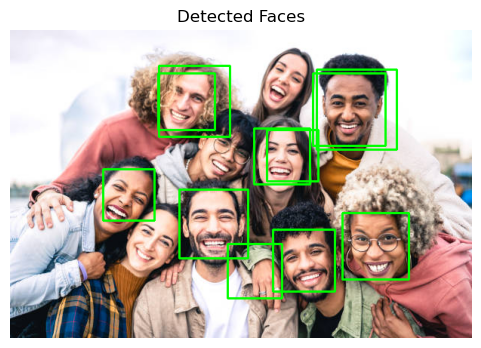

In [8]:
profiles = profile_cascade.detectMultiScale(gray, 1.1, 5)

for (x, y, w, h) in profiles:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

show_img(img, "Detected Faces")

In [9]:

if not os.path.exists("cropped_faces"):
    os.makedirs("cropped_faces")

img_original = cv2.imread(image_path)

for idx, (x, y, w, h) in enumerate(faces):
    face_crop = img_original[y:y+h, x:x+w]
    path = f"cropped_faces/face_{idx+1}.jpg"
    cv2.imwrite(path, face_crop)
    print(f"Saved: {path}")

Saved: cropped_faces/face_1.jpg
Saved: cropped_faces/face_2.jpg
Saved: cropped_faces/face_3.jpg
Saved: cropped_faces/face_4.jpg
Saved: cropped_faces/face_5.jpg
Saved: cropped_faces/face_6.jpg
Saved: cropped_faces/face_7.jpg
Saved: cropped_faces/face_8.jpg


OpenCV provides a collection of pre-trained Haar Cascade classifiers in XML format, which are useful for detecting various objects such as faces, eyes, smiles, and more. These XML files are available in the OpenCV GitHub repository:([Medium][1])

🔗 [OpenCV Haar Cascades GitHub Repository](https://github.com/opencv/opencv/tree/master/data/haarcascades)

Some commonly used Haar Cascade files include:

* `haarcascade_frontalface_default.xml`
* `haarcascade_frontalface_alt.xml`
* `haarcascade_frontalface_alt2.xml`
* `haarcascade_frontalface_alt_tree.xml`
* `haarcascade_profileface.xml`
* `haarcascade_eye.xml`
* `haarcascade_eye_tree_eyeglasses.xml`
* `haarcascade_smile.xml`
* `haarcascade_upperbody.xml`
* `haarcascade_lowerbody.xml`
* `haarcascade_fullbody.xml`
* `haarcascade_russian_plate_number.xml`
* `haarcascade_car.xml`
* `haarcascade_license_plate_rus_16stages.xml`([PyImageSearch][2], [GitHub][3], [Analytics Vidhya][4], [Stack Overflow][5])

To use these classifiers in your Python code with OpenCV, you can load them as follows:

```python
import cv2

# Load the Haar Cascade for frontal face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Check if the cascade has been loaded correctly
if face_cascade.empty():
    print("Error loading cascade classifier")
else:
    print("Cascade classifier loaded successfully")
```

